Ryan Suteja

Machine Learning

In [ ]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-04-15 06:53:28--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  5.26MB/s    in 57s     

2021-04-15 06:54:25 (5.42 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
#Import Packages
import zipfile,os
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# melakukan ekstraksi pada file zip
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/rockpaperscissors/rps-cv-images'

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

all_gen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    vertical_flip = True,
    validation_split = 0.4,
)

train_gen = all_gen.flow_from_directory(
        base_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode ='categorical',
        subset = 'training')

val_gen = all_gen.flow_from_directory(
        base_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode ='categorical',
        shuffle = False,
        subset = 'validation')

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [ ]:
#membuat model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
# latih model
history = model.fit(
      train_gen,
      steps_per_epoch=25,
      epochs=14,
      validation_data=val_gen,
      validation_steps=25)

Epoch 1/14
25/25 [==============================] - 8s 224ms/step - loss: 1.2071 - accuracy: 0.3305 - val_loss: 0.8775 - val_accuracy: 0.6475
Epoch 2/14
25/25 [==============================] - 5s 192ms/step - loss: 0.7154 - accuracy: 0.7156 - val_loss: 0.5596 - val_accuracy: 0.7937
Epoch 3/14
25/25 [==============================] - 5s 198ms/step - loss: 0.3558 - accuracy: 0.8759 - val_loss: 0.5758 - val_accuracy: 0.7837
Epoch 4/14
25/25 [==============================] - 5s 194ms/step - loss: 0.4429 - accuracy: 0.8116 - val_loss: 0.2958 - val_accuracy: 0.9013
Epoch 5/14
25/25 [==============================] - 5s 193ms/step - loss: 0.2013 - accuracy: 0.9377 - val_loss: 0.1470 - val_accuracy: 0.9513
Epoch 6/14
25/25 [==============================] - 5s 197ms/step - loss: 0.1155 - accuracy: 0.9723 - val_loss: 0.1476 - val_accuracy: 0.9563
Epoch 7/14
25/25 [==============================] - 5s 193ms/step - loss: 0.1772 - accuracy: 0.9344 - val_loss: 0.1566 - val_accuracy: 0.9500
Epoch 

In [ ]:
#Cek akurasi model
model_score = model.evaluate_generator(val_gen,steps=20)
print("Akurasi model sebesar",model_score[1])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


Akurasi model sebesar 0.971875011920929


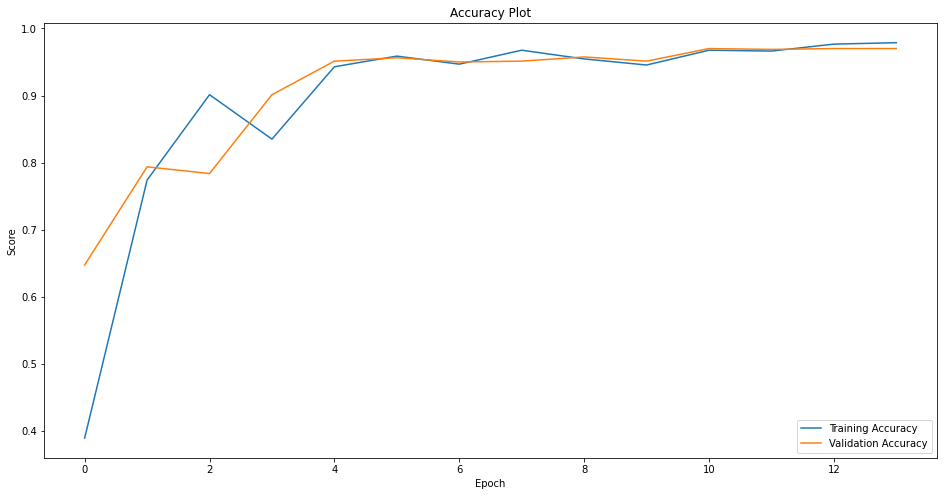

In [ ]:
#accuracy train & validation
plt.figure(figsize=(16,8))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Plot')
plt.xlabel('Epoch')
plt.ylabel('Score')
plt.legend(loc="lower right")
plt.show()

Saving WhatsApp Image 2021-04-14 at 23.12.03.jpeg to WhatsApp Image 2021-04-14 at 23.12.03 (1).jpeg
WhatsApp Image 2021-04-14 at 23.12.03.jpeg
Paper


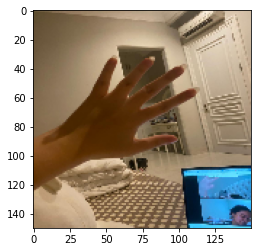

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  if classes[0][0] > classes[0][1] and classes[0][0] >  classes[0][2]:
    print('Paper')
  elif classes[0][1] > classes[0][0] and classes[0][1] > classes[0][2]:
    print('Rock')
  else:
    print('Scissors')